# <div style='text-align:center' class = 'alert alert-success'> FRONT ANALYSIS </div>

# <div style = 'text-align:center'> PART TWO </div>

## Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word
from nltk.corpus import stopwords
import re

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset first view

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv('/Users/rajathadri_as/Documents/export-messages-fmg-2023-12-12-346d-a7c7ec.csv')

In [5]:
df.head()

,Message ID,Conversation ID,Segment,Direction,Status,Inbox,Inbox API ID,Message date,Autoreply,Reaction time,Total reply time,Handle time,Response time,Attributed to,Assignee,Author,Contact name,Contact handle,Account names,To,Cc,Bcc,Extract,Tags,Tag API IDs,Message API ID,Conversation API ID,New Conversation,First response,Business hours,Subject,Segment start,Segment end,Segment closed,Last segment activity
0,34813192388,22159694404,1,Inbound,Open,Email - Horseclicks,inb_lt42,2023-01-01 01:30:18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K B,kabloom@penn.com,NaN,info@horseclicks.com,NaN,NaN,I apologize for this automatic reply to your e...,Horseclicks,tag_3dfgy,msg_fzqvj5w,cnv_a6hb5ms,1,0,0,Re: Ad alert - it's a match!,2023-01-01 01:30:18,NaN,NaN,NaN
1,34813192388,22159694404,1,Inbound,Open,Email - Internet Support,inb_lt16,2023-01-01 01:30:18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K B,kabloom@penn.com,NaN,info@horseclicks.com,NaN,NaN,I apologize for this automatic reply to your e...,Horseclicks,tag_3dfgy,msg_fzqvj5w,cnv_a6hb5ms,1,0,0,Re: Ad alert - it's a match!,2023-01-01 01:30:18,NaN,NaN,NaN
2,34813215620,22159708932,1,Inbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 01:41:41,0,NaN,NaN,NaN,NaN,support,NaN,NaN,NaN,a0a6f72b-f358-4799-bc80-8cae83f9c123,NaN,446d1708-f53c-11e7-934b-832da75fc149,NaN,NaN,Hi. How long does it usually take for an ad to...,"FAD,Syed Muhammad,Why is my ad not live","tag_1sbs2,tag_i5kxw,tag_415ok",msg_fzqw138,cnv_a6hbguc,1,0,0,NaN,2023-01-01 01:41:41,NaN,NaN,NaN
3,34813215748,22159708932,1,Outbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 01:41:42,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a0a6f72b-f358-4799-bc80-8cae83f9c123,NaN,a0a6f72b-f358-4799-bc80-8cae83f9c123,NaN,NaN,"Hi, thanks for contacting us, sorry but we are...","FAD,Syed Muhammad,Why is my ad not live","tag_1sbs2,tag_i5kxw,tag_415ok",msg_fzqw16s,cnv_a6hbguc,0,0,0,NaN,2023-01-01 01:41:41,NaN,NaN,NaN
4,34813216580,22159708932,1,Inbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 01:42:03,0,NaN,NaN,NaN,NaN,support,NaN,NaN,NaN,a0a6f72b-f358-4799-bc80-8cae83f9c123,NaN,446d1708-f53c-11e7-934b-832da75fc149,NaN,NaN,User submitted their email: lensijex067@gmail.com,"FAD,Syed Muhammad,Why is my ad not live","tag_1sbs2,tag_i5kxw,tag_415ok",msg_fzqw1tw,cnv_a6hbguc,0,0,0,NaN,2023-01-01 01:41:41,NaN,NaN,NaN


In [6]:
df.shape

(64533, 35)

## Cleaning

In [7]:
df.isnull().sum()

Message ID                   0
Conversation ID              0
Segment                      0
Direction                    0
Status                       0
Inbox                        0
Inbox API ID                 0
Message date                 0
Autoreply                    0
Reaction time            53435
Total reply time         58340
Handle time              33321
Response time            53428
Attributed to             4733
Assignee                 64513
Author                   32917
Contact name              9274
Contact handle               0
Account names            64533
To                          26
Cc                       64430
Bcc                      64523
Extract                    821
Tags                       415
Tag API IDs                415
Message API ID               0
Conversation API ID          0
New Conversation             0
First response               0
Business hours               0
Subject                  15067
Segment start                0
Segment 

In [8]:
df.drop(['Reaction time','Total reply time','Handle time','Response time','Assignee','Author','Account names','Cc','Bcc'], axis=1, inplace = True)

In [9]:
df.shape

(64533, 26)

In [10]:
df['Length'] = df['Extract'].str.len()

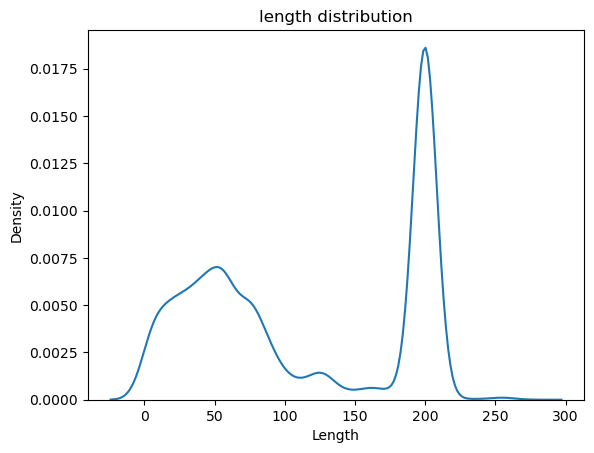

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.kdeplot(x= df['Length'],data = df).set_title('length distribution')
plt.show()

In [12]:
df['Length'].mode()

0    200.0
Name: Length, dtype: float64

In [13]:
df_uncrop = df[df['Length'] < 200]

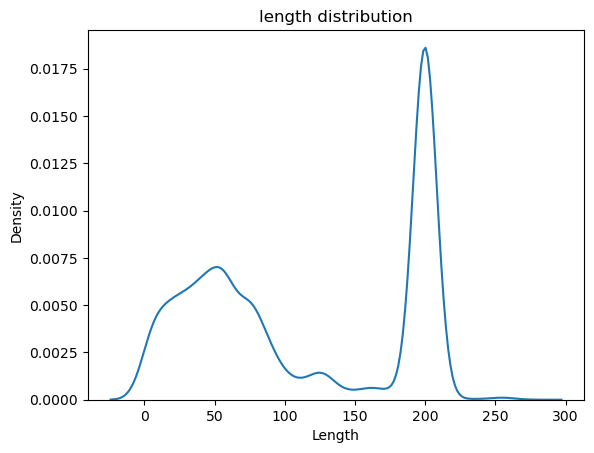

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.kdeplot(x= df['Length'],data = df).set_title('length distribution')
plt.show()

#### Length = count of words (post-cropping)

In [15]:
from collections import Counter  
  
# counts word frequency 
def count_words(text):                   
    skips = [".", ", ", ":", ";", "'", '"']  
    for ch in skips:  
        text = text.replace(ch, "")  
    word_counts = {}  
    for word in text.split(" "):  
        if word in word_counts:  
            word_counts[word]+= 1 
        else:  
            word_counts[word]= 1 
    total_words = sum(word_counts.values())
    return total_words

In [16]:
df_uncrop['Length'] = df_uncrop['Extract'].apply(count_words)

In [17]:
df_uncrop.head()

,Message ID,Conversation ID,Segment,Direction,Status,Inbox,Inbox API ID,Message date,Autoreply,Attributed to,Contact name,Contact handle,To,Extract,Tags,Tag API IDs,Message API ID,Conversation API ID,New Conversation,First response,Business hours,Subject,Segment start,Segment end,Segment closed,Last segment activity,Length
2,34813215620,22159708932,1,Inbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 01:41:41,0,support,NaN,a0a6f72b-f358-4799-bc80-8cae83f9c123,446d1708-f53c-11e7-934b-832da75fc149,Hi. How long does it usually take for an ad to...,"FAD,Syed Muhammad,Why is my ad not live","tag_1sbs2,tag_i5kxw,tag_415ok",msg_fzqw138,cnv_a6hbguc,1,0,0,NaN,2023-01-01 01:41:41,NaN,NaN,NaN,13
4,34813216580,22159708932,1,Inbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 01:42:03,0,support,NaN,a0a6f72b-f358-4799-bc80-8cae83f9c123,446d1708-f53c-11e7-934b-832da75fc149,User submitted their email: lensijex067@gmail.com,"FAD,Syed Muhammad,Why is my ad not live","tag_1sbs2,tag_i5kxw,tag_415ok",msg_fzqw1tw,cnv_a6hbguc,0,0,0,NaN,2023-01-01 01:41:41,NaN,NaN,NaN,5
8,34813360196,22159805444,1,Inbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 02:45:13,0,support,Tangerine Egret,6cdbe2b4-7fa2-4a3e-96d0-ac171e8f841c,446d1708-f53c-11e7-934b-832da75fc149,Pushy licker,"FAD,Other,Syed Muhammad","tag_1sbs2,tag_41610,tag_i5kxw",msg_fzqz4n8,cnv_a6hdjb8,1,0,0,NaN,2023-01-01 02:45:13,NaN,NaN,NaN,3
18,34814964420,22160788292,1,Inbound,Archived,Live Chat - Wightbay,inb_4lru,2023-01-01 11:11:54,0,internet,NaN,c4b4f5a5-54c6-4e78-b392-41f2b1849e26,9042b326-f53d-11e7-9eb8-ff17fb32fc6a,Looking for hardshell large suitcase with fou...,"WB,Umer Butt,Other","tag_1sbrm,tag_i5kzo,tag_41610",msg_fzrxih0,cnv_a6hylok,1,0,0,NaN,2023-01-01 11:11:54,NaN,NaN,NaN,9
19,34814967172,22160788292,1,Inbound,Archived,Live Chat - Wightbay,inb_4lru,2023-01-01 11:12:25,0,internet,NaN,c4b4f5a5-54c6-4e78-b392-41f2b1849e26,9042b326-f53d-11e7-9eb8-ff17fb32fc6a,User submitted their email: alataylor@gmail.com,"WB,Umer Butt,Other","tag_1sbrm,tag_i5kzo,tag_41610",msg_fzrxklg,cnv_a6hylok,0,0,0,NaN,2023-01-01 11:11:54,NaN,NaN,NaN,5


In [18]:
df_in  = df_uncrop[df_uncrop['Direction']=='Inbound']

In [19]:
df_in.shape

(17337, 27)

In [20]:
df_in.head()

,Message ID,Conversation ID,Segment,Direction,Status,Inbox,Inbox API ID,Message date,Autoreply,Attributed to,Contact name,Contact handle,To,Extract,Tags,Tag API IDs,Message API ID,Conversation API ID,New Conversation,First response,Business hours,Subject,Segment start,Segment end,Segment closed,Last segment activity,Length
2,34813215620,22159708932,1,Inbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 01:41:41,0,support,NaN,a0a6f72b-f358-4799-bc80-8cae83f9c123,446d1708-f53c-11e7-934b-832da75fc149,Hi. How long does it usually take for an ad to...,"FAD,Syed Muhammad,Why is my ad not live","tag_1sbs2,tag_i5kxw,tag_415ok",msg_fzqw138,cnv_a6hbguc,1,0,0,NaN,2023-01-01 01:41:41,NaN,NaN,NaN,13
4,34813216580,22159708932,1,Inbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 01:42:03,0,support,NaN,a0a6f72b-f358-4799-bc80-8cae83f9c123,446d1708-f53c-11e7-934b-832da75fc149,User submitted their email: lensijex067@gmail.com,"FAD,Syed Muhammad,Why is my ad not live","tag_1sbs2,tag_i5kxw,tag_415ok",msg_fzqw1tw,cnv_a6hbguc,0,0,0,NaN,2023-01-01 01:41:41,NaN,NaN,NaN,5
8,34813360196,22159805444,1,Inbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 02:45:13,0,support,Tangerine Egret,6cdbe2b4-7fa2-4a3e-96d0-ac171e8f841c,446d1708-f53c-11e7-934b-832da75fc149,Pushy licker,"FAD,Other,Syed Muhammad","tag_1sbs2,tag_41610,tag_i5kxw",msg_fzqz4n8,cnv_a6hdjb8,1,0,0,NaN,2023-01-01 02:45:13,NaN,NaN,NaN,3
18,34814964420,22160788292,1,Inbound,Archived,Live Chat - Wightbay,inb_4lru,2023-01-01 11:11:54,0,internet,NaN,c4b4f5a5-54c6-4e78-b392-41f2b1849e26,9042b326-f53d-11e7-9eb8-ff17fb32fc6a,Looking for hardshell large suitcase with fou...,"WB,Umer Butt,Other","tag_1sbrm,tag_i5kzo,tag_41610",msg_fzrxih0,cnv_a6hylok,1,0,0,NaN,2023-01-01 11:11:54,NaN,NaN,NaN,9
19,34814967172,22160788292,1,Inbound,Archived,Live Chat - Wightbay,inb_4lru,2023-01-01 11:12:25,0,internet,NaN,c4b4f5a5-54c6-4e78-b392-41f2b1849e26,9042b326-f53d-11e7-9eb8-ff17fb32fc6a,User submitted their email: alataylor@gmail.com,"WB,Umer Butt,Other","tag_1sbrm,tag_i5kzo,tag_41610",msg_fzrxklg,cnv_a6hylok,0,0,0,NaN,2023-01-01 11:11:54,NaN,NaN,NaN,5


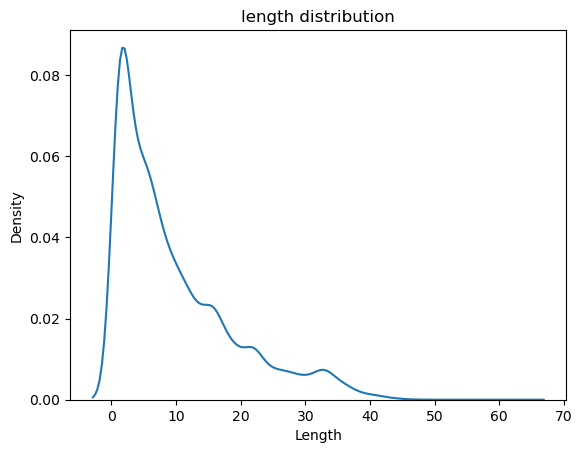

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.kdeplot(x= df_in['Length'],data = df_in).set_title('length distribution')
plt.show()

### Extract - Lemmatize

In [22]:
df_in['Extract'].head(40)

2     Hi. How long does it usually take for an ad to...
4     User submitted their email: lensijex067@gmail.com
8                                         Pushy licker 
18    Looking  for hardshell large suitcase with fou...
19      User submitted their email: alataylor@gmail.com
20                                                 Scam
23                   Can’t seem to move on to next page
24                            bgroom2@ virgin media.com
25    User submitted their email: bgroom2@virginmedi...
27                                   Hi.  How to apply?
28                           I want to become an escort
29                               ale_barboza@icloud.com
30    Hi, what is the cost to advertise a trailer pl...
37    Hey , i can't change the location, can you hel...
39                            Friendlylisa27@gmail.com 
41    I need to change to colnbrook  ,Slough and i c...
43                                     Can you help me?
45                            Friendlylisa27@gma

In [23]:
# Lemmatize
lemmatizer = WordNetLemmatizer()

In [24]:
corpus = []

text = list(df_in['Extract'])

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', str(text[i]))
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [25]:
corpus

['hi long usually take ad reviewed',
 'user submitted email lensijex gmail com',
 'pushy licker',
 'looking hardshell large suitcase four wheel',
 'user submitted email alataylor gmail com',
 'scam',
 'seem move next page',
 'bgroom virgin medium com',
 'user submitted email bgroom virginmedia com',
 'hi apply',
 'want become escort',
 'ale barboza icloud com',
 'hi cost advertise trailer please',
 'hey change location help change price help',
 'friendlylisa gmail com',
 'need change colnbrook slough',
 'help',
 'friendlylisa gmail com',
 'change location need change colnbrook slough',
 'friendlylisa gmail com',
 'post free add',
 'hi name new hot rashen karina reference ff email karinalondon gmail com working bracknell south east change location please help thank',
 'remove old ad',
 'hi',
 'hello',
 'email rileyevelyn gmail com',
 'mu ad review',
 'active please help',
 'hi could u tell advert go live please',
 'user submitted email shauncoxy gmail com',
 'hey email friendlylisa gmai

## Frequency Breakdown

In [26]:
df_copy = df_in.copy()

In [27]:
df_in['Extract'] = corpus

In [28]:
df_in.head()

,Message ID,Conversation ID,Segment,Direction,Status,Inbox,Inbox API ID,Message date,Autoreply,Attributed to,Contact name,Contact handle,To,Extract,Tags,Tag API IDs,Message API ID,Conversation API ID,New Conversation,First response,Business hours,Subject,Segment start,Segment end,Segment closed,Last segment activity,Length
2,34813215620,22159708932,1,Inbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 01:41:41,0,support,NaN,a0a6f72b-f358-4799-bc80-8cae83f9c123,446d1708-f53c-11e7-934b-832da75fc149,hi long usually take ad reviewed,"FAD,Syed Muhammad,Why is my ad not live","tag_1sbs2,tag_i5kxw,tag_415ok",msg_fzqw138,cnv_a6hbguc,1,0,0,NaN,2023-01-01 01:41:41,NaN,NaN,NaN,13
4,34813216580,22159708932,1,Inbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 01:42:03,0,support,NaN,a0a6f72b-f358-4799-bc80-8cae83f9c123,446d1708-f53c-11e7-934b-832da75fc149,user submitted email lensijex gmail com,"FAD,Syed Muhammad,Why is my ad not live","tag_1sbs2,tag_i5kxw,tag_415ok",msg_fzqw1tw,cnv_a6hbguc,0,0,0,NaN,2023-01-01 01:41:41,NaN,NaN,NaN,5
8,34813360196,22159805444,1,Inbound,Archived,Live Chat - FAD,inb_4lre,2023-01-01 02:45:13,0,support,Tangerine Egret,6cdbe2b4-7fa2-4a3e-96d0-ac171e8f841c,446d1708-f53c-11e7-934b-832da75fc149,pushy licker,"FAD,Other,Syed Muhammad","tag_1sbs2,tag_41610,tag_i5kxw",msg_fzqz4n8,cnv_a6hdjb8,1,0,0,NaN,2023-01-01 02:45:13,NaN,NaN,NaN,3
18,34814964420,22160788292,1,Inbound,Archived,Live Chat - Wightbay,inb_4lru,2023-01-01 11:11:54,0,internet,NaN,c4b4f5a5-54c6-4e78-b392-41f2b1849e26,9042b326-f53d-11e7-9eb8-ff17fb32fc6a,looking hardshell large suitcase four wheel,"WB,Umer Butt,Other","tag_1sbrm,tag_i5kzo,tag_41610",msg_fzrxih0,cnv_a6hylok,1,0,0,NaN,2023-01-01 11:11:54,NaN,NaN,NaN,9
19,34814967172,22160788292,1,Inbound,Archived,Live Chat - Wightbay,inb_4lru,2023-01-01 11:12:25,0,internet,NaN,c4b4f5a5-54c6-4e78-b392-41f2b1849e26,9042b326-f53d-11e7-9eb8-ff17fb32fc6a,user submitted email alataylor gmail com,"WB,Umer Butt,Other","tag_1sbrm,tag_i5kzo,tag_41610",msg_fzrxklg,cnv_a6hylok,0,0,0,NaN,2023-01-01 11:11:54,NaN,NaN,NaN,5


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajathadri_as\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
stpwrd = nltk.corpus.stopwords.words('english')

In [31]:
count_vectorizer = CountVectorizer(stop_words=stpwrd)

In [32]:
counts = count_vectorizer.fit_transform(corpus)

counts_df =  pd.DataFrame(counts.toarray(), columns = count_vectorizer.get_feature_names_out())
counts_df.head()

aa  aaaaagggghhhhh  aadd  aaetujwodyiqwklwywdufhzeaddejkaje  aalexarebeca  \
0   0               0     0                                  0             0   
1   0               0     0                                  0             0   
2   0               0     0                                  0             0   
3   0               0     0                                  0             0   
4   0               0     0                                  0             0   

   aaron  aaronhutchinson  ab  aba  abarnard  abdul  abdullah  abercrombie  \
0      0                0   0    0         0      0         0            0   
1      0                0   0    0         0      0         0            0   
2      0                0   0    0         0      0         0            0   
3      0                0   0    0         0      0         0            0   
4      0                0   0    0         0      0         0            0   

   aberd  aberdeen  aberdeenshire  abhi  abigail  abigailgriffithswhite  \
0      0         0              0     0        0                      0   
1      0         0              0     0        0                      0   
2      0         0              0     0        0                      0   
3      0         0              0     0        0                      0   
4      0         0              0     0        0                      0   

   ability  able  abou  absolutely  abusive  abv  abysmal  ac  acc  accept  \
0        0     0     0           0        0    0        0   0    0       0   
1        0     0     0           0        0    0        0   0    0       0   
2        0     0     0           0        0    0        0   0    0       0   
3        0     0     0           0        0    0        0   0    0       0   
4        0     0     0           0        0    0        0   0    0       0   

   acceptable  accepted  accepting  acces  access  accessing  accessory  \
0           0         0          0      0       0          0          0   
1           0         0          0      0       0          0          0   
2           0         0          0      0       0          0          0   
3           0         0          0      0       0          0          0   
4           0         0          0      0       0          0          0   

   accidentally  accommodation  acconts  accord  according  account  accout  \
0             0              0        0       0          0        0       0   
1             0              0        0       0          0        0       0   
2             0              0        0       0          0        0       0   
3             0              0        0       0          0        0       0   
4             0              0        0       0          0        0       0   

   acct  acctualy  accurate  acdc  aceasi  acessories  acest  achieves  \
0     0         0         0     0       0           0      0         0   
1     0         0         0     0       0           0      0         0   
2     0         0         0     0       0           0      0         0   
3     0         0         0     0       0           0      0         0   
4     0         0         0     0       0           0      0         0   

   ackers  ackley  across  act  action  activate  activated  activation  \
0       0       0       0    0       0         0          0           0   
1       0       0       0    0       0         0          0           0   
2       0       0       0    0       0         0          0           0   
3       0       0       0    0       0         0          0           0   
4       0       0       0    0       0         0          0           0   

   active  actived  actual  actually  acura  acvount  ad  adam  \
0       0        0       0         0      0        0   1     0   
1       0        0       0         0      0        0   0     0   
2       0        0       0         0      0        0   0     0   
3       0        0       0         0      0    

In [33]:
# counting terms
counts_dict = {}

# Store the words as key-value pairs
for ii, word in enumerate(counts_df.columns):
    counts_dict[word] = sum(counts_df[str(word)])
    word_count = [(i,count) for i,count in list(zip(counts_dict.keys(), counts_dict.values()))]

In [34]:
sorted_counts = sorted(word_count, key = lambda x: x[1], reverse = True)
sorted_counts[:100]

[('ad', 3056),
 ('hi', 2027),
 ('email', 1866),
 ('please', 1779),
 ('com', 1734),
 ('advert', 1584),
 ('thanks', 1400),
 ('thank', 1285),
 ('sent', 1203),
 ('verify', 1142),
 ('hello', 1033),
 ('uid', 908),
 ('gmail', 876),
 ('add', 841),
 ('prod', 832),
 ('ok', 819),
 ('alert', 802),
 ('mdb', 802),
 ('need', 783),
 ('rule', 717),
 ('message', 690),
 ('firing', 660),
 ('live', 590),
 ('iphone', 556),
 ('help', 536),
 ('instance', 508),
 ('account', 504),
 ('yes', 488),
 ('regard', 475),
 ('ref', 467),
 ('uk', 466),
 ('one', 464),
 ('ff', 454),
 ('ro', 452),
 ('co', 444),
 ('want', 438),
 ('put', 414),
 ('sync', 403),
 ('id', 397),
 ('grafana', 368),
 ('good', 367),
 ('get', 366),
 ('mail', 361),
 ('outlook', 359),
 ('number', 356),
 ('folder', 355),
 ('alertname', 354),
 ('grouped', 354),
 ('paid', 353),
 ('could', 352),
 ('still', 352),
 ('trying', 351),
 ('received', 350),
 ('change', 348),
 ('place', 342),
 ('know', 329),
 ('new', 329),
 ('like', 325),
 ('see', 321),
 ('verificatio

# Breakdown

## Seller

### Payment

In [35]:
corpus = []

text = list(df[df['Extract'].str.contains('paid', case=False, na=False)]['Extract'])

In [36]:
text

['You have received a new message. Name: stewart.fletcher2 Email: stewart.fletcher2@ntlworld.com Ad ID: _ Message: Hi just set up and paid for add through PayPal but the add isn’t showing Log in now Vis',
 "I've paid for a ad which isn't showing ",
 'Hi. I paid for an advert for my budgies. When I went to the website to check it, the page wasnt displaying properly and by mistake I must have pushed remove ad, which it did without warning. Is there ',
 "I tried to contact someone yesterday, I paid for a ad and it's only just come live today so I've missed a day ",
 "It's just gone live now but I needed it yesterday when I paid for it",
 'Thank you for getting back to me. I paid for one week but then stopped my ad and deleted it Will I be charged again if I were to place a new ad? On Tue, 3 Jan 2023, 09:53 Support FAD, <support@friday-',
 "You have received a new message. Name: Lisa Thomson Email: lisa.thomson@tiscali.co.uk Ad ID: Message: Hi I paid for my advert by PayPal but wasn't dire

Double payment issue were apparently resolved in Oct'23.

In [37]:
df_in.shape

(17337, 27)

In [38]:
df_oct = df[df['Message date']>='2023-10-01 01:01:01']

In [39]:
df_oct.shape

(9677, 27)

In [40]:
df_oct = df_oct[df_oct['Direction']=='Inbound']

In [41]:
df_oct.shape

(4527, 27)

In [42]:
corpus = []

text = list(df_oct[df_oct['Extract'].str.contains('paid', case=False, na=False)]['Extract'])

In [43]:
text

['You have received a new message. Name: Robin Johnson Email: robinsproperties1@gmail.com Ad ID: Twin Oaks Ranch 45 acres Message: I added to my Ad "Special Features" and I also edited the Ad. I paid on',
 'I paid £125 to be a ad of the week in Brighton ',
 'I see you removed the free option on the adds I previously paid for. So not impressed. On Saturday, September 30, 2023 at 09:17:22 PM CDT, Horseclicks <info@horseclicks.com> wrote: Hey Amber Your ad i',
 'I see you removed the free option on the adds I previously paid for. So not impressed. On Saturday, September 30, 2023 at 09:17:22 PM CDT, Horseclicks <info@horseclicks.com> wrote: Hey Amber Your ad i',
 'I see you removed the free option on the adds I previously paid for. So not impressed. On Saturday, September 30, 2023 at 09:17:22 PM CDT, Horseclicks <info@horseclicks.com> wrote: Hey Amber Your ad i',
 'I see you removed the free option on the adds I previously paid for. So not impressed. On Saturday, September 30, 2023 at 09:1

Can confirm. The deployment has worked effectively. Insignificant number of double payments from Oct'23.

In [44]:
corpus = []

text = list(df_oct[df_oct['Extract'].str.contains('paypal', case=False, na=False)]['Extract'])

In [45]:
text

['I’ve just tried to place an advert for my air rifle paying with PayPal. The system passed through to the payment section and processed the payment. The website then cycled for a few seconds and brough',
 'You have received a new message. Name: David cunvin Email: biigd@live.co.uk Ad ID: Message: If paid for ad for my tx200 via PayPal but have soon yet and saying no active ads Log in now Visit Gunstar',
 'You have received a new message. Name: fomjam72 Email: fomjam72@gmail.com Ad ID: _ Message: Hello I recently listed a Stoeger air riffle but it isn’t showing, I paid £4.99 PayPal. Could you look for m',
 'You have received a new message. Name: TERESA STRICKLAND Email: hiddenridgefarm@gmail.com Ad ID: Message: I placed an ad yesterday on a horse and it took money out of my PayPal but is not showing up a',
 'Good day I have add four approaches where this person is saying they wish to purchase , however it is I believe a front to make scam frauds with my email address and Paypal So this

### Verify

In [46]:
corpus = []

text = list(df[df['Extract'].str.contains('verify', case=False, na=False)]['Extract'])

In [47]:
text

["Hi I'm trying to put my puppies up for sale but need to verify my email address?? Regards Scott pulling",
 'I have been asked to email you guys to verify my add',
 'Hi Just had an email to ask me to email you to verify my ad for my French bulldog puppies Regards Heidi Jackson Sent from my iPhone',
 'I have received a message to say I need to verify my email Sent from Outlook for iOS',
 'Hello Scott, Thank you for your coordination with us in order to verify your ad. We highly appreciate it, Furthermore, Congratulations, we have activated your advertisement and published it on the web',
 'Hi there This email is to verify my account. Do I need to do anything else? Kind regards, Gemma ',
 'Hello Margaret, Be noted, that you just missed our verification call, Additionally, this email informs you that we tried to reach you twice via phone to verify your advertisement and publish it on the',
 'Hi you’ve asked me to email you to verify my ad? Nancy Begin forwarded message: From: Kitten Ads 

### Edit Ads

In [48]:
corpus = []

text = list(df[df['Extract'].str.contains('photo', case=False, na=False)]['Extract'])

In [49]:
text

['Is it permitted to post a nude photo (no private bits visible) on an advertisers profile? On Sun, 1 Jan 2023, 01:47 FMG, <support@friday-ad.co.uk> wrote: Hi, thanks for contacting us, sorry but we are',
 'delete photo?',
 "I did not see any photos in your ad titled ‘ANGEL'S TOUCH’ - FOR THE EXECUTIVE MAN ",
 'I had about 20 photos, all sensual arty pics',
 'Yes this ad has photos ',
 "Hi Paul Johnson , I believe you're fine. Thank you for contacting us and letting us know your concern. I have just pulled out the details of your account and I can see that there is no photo attached ",
 'Do not worry . Please share the photos with us on this email. We will upload for you. If you have any question please do not hesitate to contact us. Best Regards, Syed Technical & Customer Experience ',
 'I have just added this photo. If you want to upload more photos please send us more. If you have any issue sending us photos o n this email Please send us photos on support@friday-ad.co.uk . Still we 

### Account

In [50]:
corpus = []

text = list(df[df['Extract'].str.contains('account', case=False, na=False)]['Extract'])

In [51]:
text

['You have received a new message. Name: Milo Hewitson Email: hewitsonmilo@gmail.com Ad ID: Weihrauch HW110 Message: Hello, I cannot sign into my account and my password does not work so I try and reset',
 'Hello Scott, I hope you are doing well. This email is about the "Account Verification Process". Firstly, I would like to thank you for contacting us and will ask you to please reply to this email with',
 'Hello Annette, I hope you are doing well. This email is about the "Account Verification Process". Firstly, I would like to thank you for contacting us and will ask you to please reply to this email wi',
 'Hello Neil, I hope you are doing well. This email is about the "Account Verification Process". Firstly, I would like to thank you for contacting us and will ask you to please reply to this email with ',
 'Hello Rajesh, I hope you are doing well. This email is about the "Account Verification Process". Firstly, I would like to thank you for contacting us and will ask you to please r

### PAA

In [52]:
corpus = []

text = list(df[df['Extract'].str.contains('place', case=False, na=False)]['Extract'])

In [53]:
text

['Hi I am trying to place a new advert & I keep getting the above message when I try to login or change my password. Please advise. Best regards Bev Lynn',
 'How do I place an ad selling puppies ',
 'Yes you can place an ad on our website https://www.friday-ad.co.uk/ ',
 'We are just providing classified ads services. You can place your ad on our websie. ',
 'Thank you for getting back to me. I paid for one week but then stopped my ad and deleted it Will I be charged again if I were to place a new ad? On Tue, 3 Jan 2023, 09:53 Support FAD, <support@friday-',
 'Hi there, Thank you for getting back to us. Yes, as you have mentioned once you place an Ad and it becomes live and when you have used up the Ad, you will have to place a new one. I hope this clarifie',
 'It actually never went live. It was under review and I stopped it before it went live. I originally placed it on Saturday night. The first day it would potentially been live would have been today, as ',
 'Hi trying to place an a

### Refund

In [54]:
corpus = []

text = list(df[df['Extract'].str.contains('refund', case=False, na=False)]['Extract'])

In [55]:
text

["Hi There , I believe you're fine. Thank you for contacting us and letting us know your concern. I have just pulled out the details of your account and I have just processed a refund of 32.99£ for you.",
 'Dear Support, If you search Mauser , my pistol does not come up in the search , tried 5 Minuit ago, Please refund my money or correct the problem Thanks Roger Sent from my iPad On 4 Jan 2023, at 08:58',
 'Please see screen shot my gun is definitely not listed when searched for ! Please refund my money Thanks rog ------ Original Message ------ From: "Support GS" <support@gunstar.co.uk> To: "roger.marley',
 'Hi Heidi, Thank you for contacting support. I am pleased to confirm your duplicate payment of GBP 17.98 against Ad Ref #HM30192AE has been successfully refunded. Please note that this amount may take ',
 'Hi Heidi, Thank you for contacting support. I am pleased to confirm your duplicate payment of GBP 17.98 against Ad Ref #HM30192AE has been successfully refunded. Please note that

## Buyers

### Search support

In [56]:
corpus = []

text = list(df[df['Extract'].str.contains('near', case=False, na=False)]['Extract'])

In [57]:
text

['i need help looking for a horse near me ',
 'can u hel me find a horse near me to loan for under 100 pounds',
 "Hi I've been searching on your website for kittens near me, however, every ad that I click on states that the advert is no longer live. Are you not able to delete sold kittens and keep the ads up to d",
 '£ 350SOLD ONO Webley & Scott Raider 12 .22 Air Rifles ad ref. GS25133CA Somerton, South WestPublished 25 Days ago Details CategoryAir Guns SubcategoryAir Rifles ConditionNearly New Sale typePrivate Ma',
 "You have received a new message. Name: lorbowlers Email: lorbowlers@gmail.com Ad ID: _ Message: Hi I've got a Swift 2011 Moselle which is sited and I'mlooking to sell it in the near future Swift Mosel",
 'Hi has anything happened with this my advert is nearly finished and I have lost a couple of sales because I can not reply Sent from my iPad On 14 Jan 2023, at 10:30, Support <support@gunstar.co.uk> wr',
 "Hello, please can the location for my advert be updated to Crawley